11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


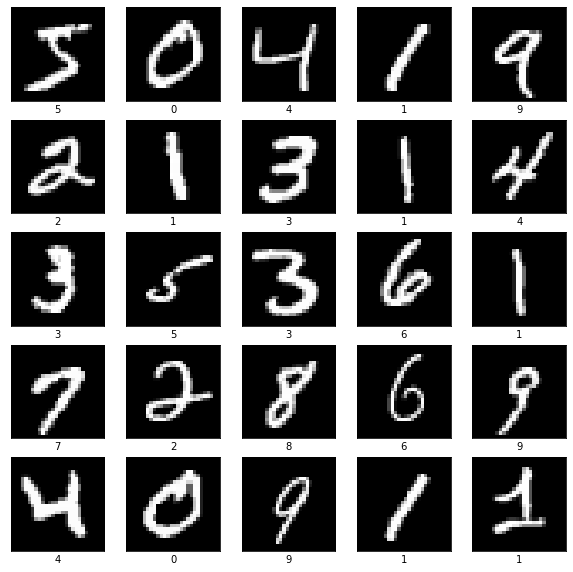

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 10)
(60000, 28, 28, 1)
Epoch 1/5
1875/1875 [==============================] - 79s 41ms/step - loss: 0.2049 - accuracy: 0.9366
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0762 - accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0602 - accuracy: 0.9809
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0530 - accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0456 - accuracy: 0.9852
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                             

In [1]:
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# Model
num_classes = 10
input_shape = (28, 28, 1)

# train and test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")

# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)

# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),

    ]
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# TODO: provedi ucenje mreze
print(y_train_s.shape)
print(x_train_s.shape)

model.fit(x_train_s, y_train_s, epochs=5, batch_size=32)

# TODO: Prikazi test accuracy i matricu zabune
model.summary()
loss_and_metrics = model.evaluate(x_test_s, y_test_s, batch_size=128)
print("Model accuracy: ", loss_and_metrics)

Y_predict = model.predict(x_test_s)
Y_predict = np.argmax(Y_predict, 1)
Y_test = np.argmax(y_test_s, 1)
mtx = confusion_matrix(Y_test, Y_predict)
print(mtx)

# TODO: spremi model
model.save('model')


In [2]:
from keras.utils import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv

filename = 'test.png'

img = cv.imread(filename=filename)
img = color.rgb2gray((img))
img = resize(img, (28, 28))

plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')

# TODO: ucitaj model
model = load_model(filepath="model")

# TODO: napravi predikciju 
prediction = model.predict(img)
classes = np.argmax(prediction, axis=1)

# TODO: ispis rezultat
print("------------------------")
print("Prediction is number: ", classes[0])

filename = 'test2.png'

img = cv.imread(filename=filename)
img = color.rgb2gray((img))
img = resize(img, (28, 28))

plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')

model = load_model(filepath="model")

prediction = model.predict(img)
classes = np.argmax(prediction, axis=1)

print("------------------------")
print("Prediction is number: ", classes[0])


AttributeError: ignored

In [ ]:
import cv2
import numpy as np
import joblib
from sklearn.neural_network import MLPClassifier
from keras.models import load_model
from skimage import color

# display
cv2.namedWindow("frame", cv2.WINDOW_NORMAL)   
cv2.namedWindow("edges", cv2.WINDOW_NORMAL)
font = cv2.FONT_HERSHEY_SIMPLEX

# TODO: ucitaj mrezu s diska
model = load_model('model')
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# algorithm params
pad = 15
size_th = 32
mnist_size = 28

# video processing
cp = cv2.VideoCapture(0)
kernel1 = np.ones((7,7), np.uint8)
kernel2 = np.ones((5,5), np.uint8)

# some vars
label = "unkown"

while True:
    
    ret, frame = cp.read(0)

    # frame preprocessing - getting edges
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # gray_img = color.rgb2gray((frame))
    gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    v = np.median(gray_img)
    lower = int(max(0, (1.0 - 0.33) * v))
    upper = int(min(255, (1.0 + 0.33) * v))
    edge_img = cv2.Canny(gray_img, lower, upper)
    img_preprocessed = cv2.dilate(edge_img, kernel1, iterations=1)
    img_preprocessed = cv2.erode(img_preprocessed, kernel2, iterations=1)

    # get countours and bounding boxes (rects)
    contours, _ = cv2.findContours(img_preprocessed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    rects = [cv2.boundingRect(contour) for contour in contours]
    rects = [rect for rect in rects if rect[2] >= 3 and rect[3] >= 8]

    # loop over all rectangles (detections) and classify them
    for rect in rects:
        
        x, y, w, h = rect

        #crop rectangle from image        
        cropped_digit = img_preprocessed[y-pad:y+h+pad, x-pad:x+w+pad]
        cropped_digit = cropped_digit/255.0

        #filter small rectangles:
        if cropped_digit.shape[0] >= size_th and cropped_digit.shape[1] >= size_th:
            cropped_digit = cv2.resize(cropped_digit, (mnist_size, mnist_size))
        else:
            continue
        
        # start TODO: klasificiraj sliku (cropped_digit) s konvolucijskom neuronskom mrezom i zapisi predikciju u varijablu label (as string)
        predict = model.predict(cropped_digit) 
        classes = np.argmax(predict,axis=1)
        label = str(classes[0])

        # end of TODO

        # show rectangle and label on frame
        cv2.rectangle(frame, (x - pad, y - pad), (x + pad + w, y + pad + h), color = (255, 255, 0))

        cv2.putText(frame, label, (rect[0], rect[1]), font,
            fontScale = 0.5,
            color = (255, 0, 0),
            thickness =  1,
            lineType =  cv2.LINE_AA)

    # show results
    cv2.imshow("frame", frame)
    cv2.imshow("edges", img_preprocessed)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
